# Notebook to analyze output of Grid code for SU(4)
## Gather Plaquette, polyakov loop and Acceptance 
Author: Venkitesh Ayyar (vayyar@bu.edu) \
March 27, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import subprocess as sp
import os 
import glob
import pandas as pd

In [3]:
# %matplotlib widget

In [4]:
%matplotlib notebook

### Get Plaquette value

In [5]:
def f_get_plaquette(fname):
    
    
    # Get Plaquette values
    cmd="grep 'Plaq' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    arr=np.array([[int(i.split('[ ')[-1].split(' ]')[0]), 
      np.float64(i.split(' ')[-1]),
      np.float64(i.split(': ')[2].split(' s')[0])] 
     for i in op])
    
    return arr

def f_get_polyakov(fname):
    
    # Gather Polykov loop values
    cmd="grep 'Polyakov' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    arr=np.array([complex(np.float64(i.split(' ')[-1][1:-1].split(',')[0]),
             np.float64(i.split(' ')[-1][1:-1].split(',')[1])) 
     for i in op ])
    
    return arr


def f_get_traj_time(fname):
    
        ## Total time
    cmd="grep 'Total time for trajectory' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    arr=[np.float32(i.split(': ')[-1]) for i in op]
    
    return arr

def f_get_metropolis(fname,lgth):
    
        ## Metropolis values
    cmd="grep 'Metropolis_test' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    ## Other arrays have equilibriation data, metropolis doesn't. So we need to add nans to make them the same size
    
    arr_temp=[1 if (i.split(' ')[-1]=='ACCEPTED') else 0 for i in op] # Accept =1 , Reject = 0
    skip=lgth-len(arr_temp)
#     print("skip",skip)
    arr_skip=[np.nan for i in range(skip)]
    arr=np.array(arr_skip+arr_temp)
    
    return arr



def f_gather_data(fname):
    
    full_size=210 ## Trick to avoid double runs
    
    arr1=f_get_plaquette(fname)[:full_size]
    
    arr2=f_get_polyakov(fname)[:full_size]
    
    arr3=f_get_traj_time(fname)[:full_size]
    
    lgth=min(len(arr1),len(arr2),len(arr3))
    print(lgth)

    arr4=f_get_metropolis(fname,lgth)[:full_size]
    
    ## Create dataframe
    cols=['iter','Plaquette','Polyakov','Traj_time','Accept','Plaq_epoch']
    df=pd.DataFrame(columns=cols)

    df['Plaquette']=arr1[:,1]
    df['Plaq_epoch']=arr1[:,2]
    df['iter']=arr1[:,0].astype(int)
    df['Polyakov']=arr2
    df['Traj_time']=arr3
    df['Accept']=arr4

    return df


In [7]:
# beta=10.75
# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run3_hsdm/SDM.4node'
# fname='/usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run_Lx-16_Lt-8_beta-%s_mf-0.6443/HSDM.out'%(beta)
fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_june15_mobius/dm_tests/phase_diagram_mobius_Ls8/run_Lx-16_Lt-32_Ls-16_beta-10.8_mf-0.1/HSDM.out'
print(fname)
df = f_gather_data(fname)

/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_june15_mobius/dm_tests/phase_diagram_mobius_Ls8/run_Lx-16_Lt-32_Ls-16_beta-10.8_mf-0.1/HSDM.out
20


In [9]:
df

,iter,Plaquette,Polyakov,Traj_time,Accept,Plaq_epoch
0,1,0.686071,0.004082+0.000087j,189.354996,NaN,191.909200
1,2,0.653167,0.005844-0.004139j,201.841003,NaN,392.900004
2,3,0.629056,-0.002463+0.001160j,204.164993,NaN,597.115079
3,4,0.611396,0.004479+0.000837j,203.884003,NaN,801.493380
4,5,0.598837,-0.005773+0.002142j,204.697006,NaN,1005.796651
5,6,0.589595,-0.000323+0.001377j,205.089996,NaN,1211.385811
6,7,0.583269,-0.000651+0.000842j,207.091995,NaN,1418.527043
7,8,0.578749,-0.001181-0.001297j,207.604004,NaN,1626.180742
8,9,0.575207,-0.002453+0.001866j,208.384995,NaN,1834.615972
9,10,0.572467,-0.003523-0.001804j,209.350998,NaN,2044.176550


## Plot Plaquette

<IPython.core.display.Javascript object>


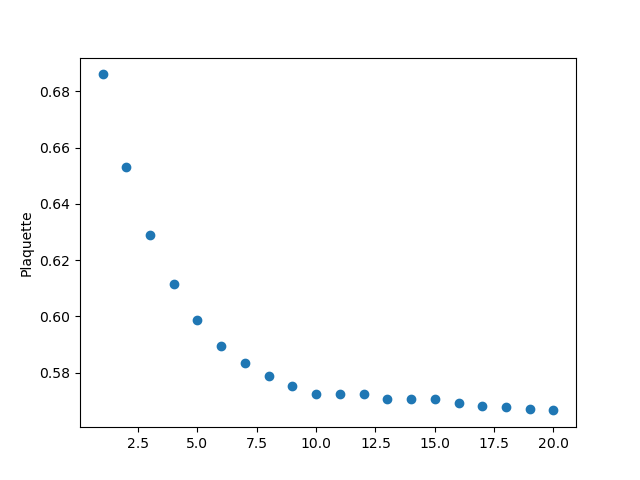

In [10]:
plt.figure()
x=df.iter.values
y=df.Plaquette.values
# y=df.Traj_time.values

plt.plot(x,y,marker='o',linestyle='')
plt.ylabel('Plaquette')
plt.show()

### Plot Polyakov loop

<IPython.core.display.Javascript object>


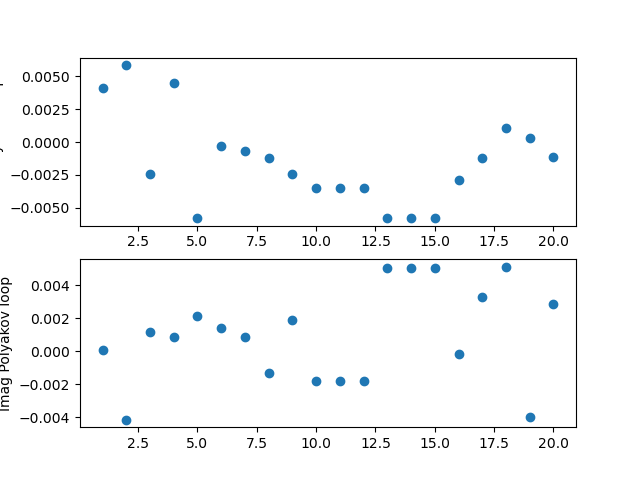

In [11]:
fig=plt.figure()
x=df.iter.values
y=df.Polyakov.values
fig.add_subplot(2,1,1)

plt.plot(x,y.real,marker='o',linestyle='')
plt.ylabel('Real Polyakov loop')

fig.add_subplot(2,1,2)

plt.plot(x,y.imag,marker='o',linestyle='')
plt.ylabel('Imag Polyakov loop')
plt.show()


<IPython.core.display.Javascript object>


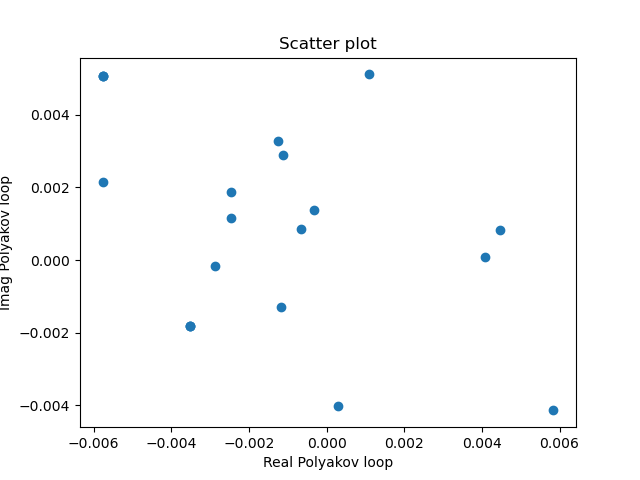

In [12]:
fig=plt.figure()
x=df.iter.values
y=df.Polyakov.values

y1=y.real
y2=y.imag

plt.scatter(y1,y2)
plt.xlabel('Real Polyakov loop')
plt.ylabel('Imag Polyakov loop')
plt.title("Scatter plot")
plt.show()

### Polyakov loop histogram 

<IPython.core.display.Javascript object>


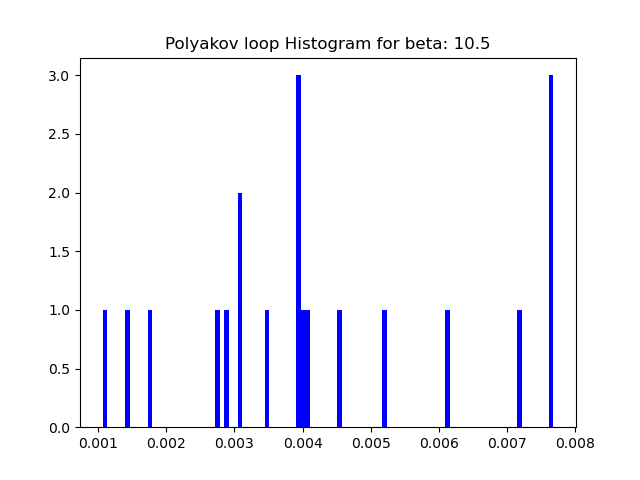

Text(0.5, 1.0, 'Polyakov loop Histogram for beta: 10.5')

In [13]:
fig=plt.figure()
x=df.iter.values[:210]
y=np.abs(df.Polyakov.values[:210])

# hist,bins=np.histogram(y,bins=10)
# plt.bar(np.linspace(0,0.3,10),hist)
# plt.stairs(hist)

plt.hist(y,bins=100,color='b')

# plt.xlabel('Real Polyakov loop')
# plt.ylabel('Imag Polyakov loop')
plt.title("Polyakov loop Histogram for beta: %s"%(10.50))
# plt.savefig('ploop_histogram.pdf')


### Plot acceptance

<IPython.core.display.Javascript object>


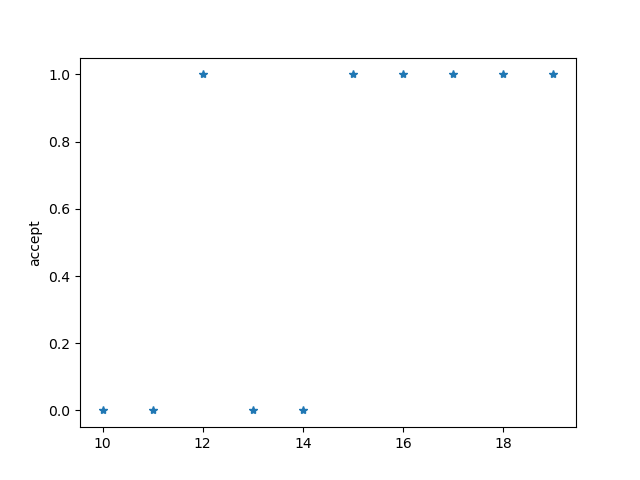

In [14]:
plt.figure()
x=df.iter.values
y=df.Accept.values
plt.ylabel('accept')
plt.plot(y,marker='*',linestyle='')
plt.show()

In [15]:
# Print Acceptance ratio
ct=df['Accept'].dropna().value_counts()
print(ct)

if len(ct)<2:
    print("Only one type",ct)
    pass 
elif len(ct)==2:     
    Act=ct[1]
    Rft=ct[0]
    print(Act* 100 /(Act+Rft),'%')

1.0    6
0.0    4
Name: Accept, dtype: int64
60.0 %
